In [1]:
%%html
<style>
.output_wrapper, .output {
    height:auto !important;
    max-height:1000px;  /* your desired max-height here */
}
.output_scroll {
    box-shadow:none !important;
    webkit-box-shadow:none !important;
}
</style>

<IPython.core.display.Javascript object>


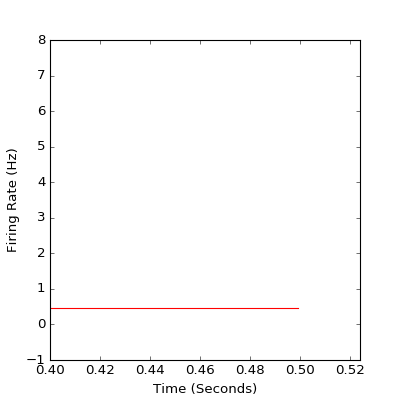

In [5]:
%matplotlib notebook
import zmq
import threading
import ipywidgets as ipw
from IPython.display import display
import time
from dipde.interfaces import PopulationInterface
import ipywidgets as ipw
from IPython.display import display, clear_output
import numpy as np 
from dipde.internals.internalpopulation import InternalPopulation
from dipde.internals.externalpopulation import ExternalPopulation
from dipde.internals.simulationconfiguration import SimulationConfiguration
from dipde.internals.network import Network
from dipde.internals.simulation import Simulation
from dipde.internals.connection import Connection as Connection
import scipy.stats as sps
from dipde.interfaces.jupyter import ProgressBar, ZMQIntSlider, wrap_widget
import time
import logging
import os
import dipde
assert dipde.__version__ == '0.2.1'
from IPython.display import display, clear_output
import matplotlib.pyplot as plt
import ipywidgets as ipw
import logging
from IPython.display import HTML
from dipde.interfaces import PopulationInterface
logging.disable(logging.CRITICAL)
import traitlets
import time
import threading
logging.disable(logging.CRITICAL)


t0 = 0.
dt = .001
dv = .001
v_max = .02
tf = .5
tau_m=.02
weights=.005
window_size = .1

fig, ax = plt.subplots(1,1, figsize=(5,5))



b1 = wrap_widget(ExternalPopulation(), ZMQIntSlider(5555, display=True, value=100, min=0, max=200, continuous_update=False), 'external_firing_rate')
i1 = InternalPopulation(v_min=0, tau_m=tau_m, v_max=v_max, dv=dv, update_method='approx')


b1_i1 = wrap_widget(Connection(b1, i1, 1, weights=weights), ZMQIntSlider(5556, display=True, value=1, min=1, max=3, continuous_update=False), 'nsyn') 
# b1_i1 = get_ConnnectionNsynZMQ(ZMQIntSlider(5557, display=True, value=5, max=10, continuous_update=False), source=b1, target=i1, weights=weights)
# b1_i1 = Connection(b1, i1, 1, weights=weights)

def update_callback(n):
    time.sleep(.1)
    
i1.plot(xlim=(0,window_size), ax=ax, ylim=(-1,8), color='r', show=False)
def checkpoint_callback(s):
    p = s.network.population_list[1]

    window_points = int(window_size/dt)

    if len(p.t_record) < window_points:

        t_vals = p.t_record
        y_vals = p.firing_rate_record
    else:
        t_vals = p.t_record[-window_points:]
        y_vals = p.firing_rate_record[-window_points:]

    ax.lines[0].set_xdata(t_vals)
    ax.lines[0].set_ydata(y_vals)
    if t_vals[-1] < window_size:
        t_max = window_size
    else:
        t_max = t_vals[-1]*1.05

    ax.set_xlim((t_vals[0],t_max))

    fig.canvas.draw()

network = dipde.Network([b1, i1], [b1_i1], update_callback=update_callback, progress=ProgressBar())
simulation_configuration = dipde.SimulationConfiguration(dt, tf, t0=t0, checkpoint_period=.2)
simulation = dipde.Simulation(network=network, simulation_configuration=simulation_configuration, checkpoint_callback=checkpoint_callback)

simulation.start()


In [4]:
# ExternalPopulation(None)
Connection(b1, i1, None, weights=weights)